### 1. DEFINE THE PROBLEM

#### Objective:
preparing a MACHINE LEARNING Based model, trained on the House Price Prediction Dataset. 

#### Data Source:
https://media.geeksforgeeks.org/wp-content/uploads/20240905183434/HousePricePrediction.xlsx
* Key columns (Id, MSSubClass, MSZoning, LotArea, LotConfig, BldgType, OverallCond, YearBuilt, YearRemodAdd, Exterior1st, BsmtFinSF2, TotalBsmtSF, SalePrice )

#### Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## 2. DATA ACQUISITION

#### Data Collection:

In [2]:
# Dataset
data = pd.read_excel('HousePricePrediction.xlsx')
data.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


#### Data Understanding:

In [3]:
# Dimensionality of the Dataset
data.shape

(2919, 13)

In [4]:
# Summary of the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [5]:
# Basic Statistics
data.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [6]:
# Number of Missing Values in Dataset
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [7]:
# Datatype of each Column
data.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

## 3. DATA CLEANING AND PREPROCESSING

#### Handle Missing Data

In [8]:
# Replace SalePrice null values with the mean
data['SalePrice'].fillna(data['SalePrice'].mean(), inplace=True)

C:\Users\nishu\AppData\Local\Temp\ipykernel_50572\293903852.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['SalePrice'].fillna(data['SalePrice'].mean(), inplace=True)


In [9]:
data.isnull().sum()

Id              0
MSSubClass      0
MSZoning        4
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     1
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64

In [10]:
# Removing the row with Null values
data.dropna(inplace=True)

In [11]:
data.shape

(2913, 13)

In [12]:
# Removing the rows with duplicate values
data.drop_duplicates(inplace=True)

In [14]:
# Dataset Dimensions
data.isnull().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [15]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncode nominal categorical features
categorical_cols = ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Confirm changes
print("Encoded Data Sample:\n", data.head())

Encoded Data Sample:
    Id  MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0   0          60     8450            5       2003          2003         0.0   
1   1          20     9600            8       1976          1976         0.0   
2   2          60    11250            5       2001          2002         0.0   
3   3          70     9550            5       1915          1970         0.0   
4   4          60    14260            5       2000          2000         0.0   

   TotalBsmtSF  SalePrice  MSZoning_FV  ...  Exterior1st_CemntBd  \
0        856.0   208500.0        False  ...                False   
1       1262.0   181500.0        False  ...                False   
2        920.0   223500.0        False  ...                False   
3        756.0   140000.0        False  ...                False   
4       1145.0   250000.0        False  ...                False   

   Exterior1st_HdBoard  Exterior1st_ImStucc  Exterior1st_MetalSd  \
0                Fal

## 4. EXPLORATORY DATA ANALYSIS (EDA)

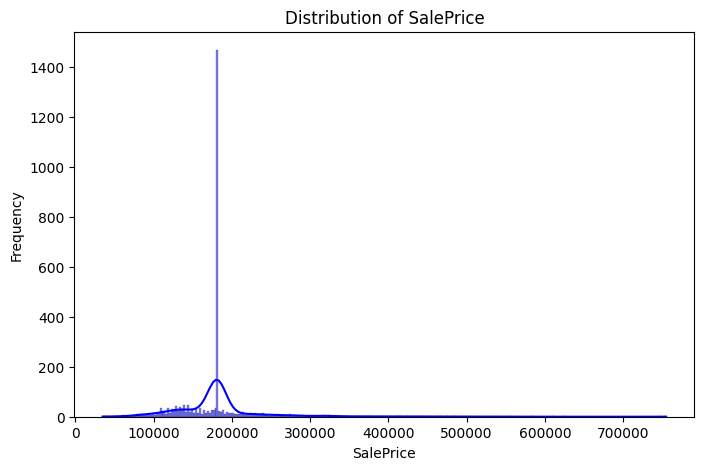

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plot for SalePrice
plt.figure(figsize=(8, 5))
sns.histplot(data['SalePrice'], kde=True, color='blue')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

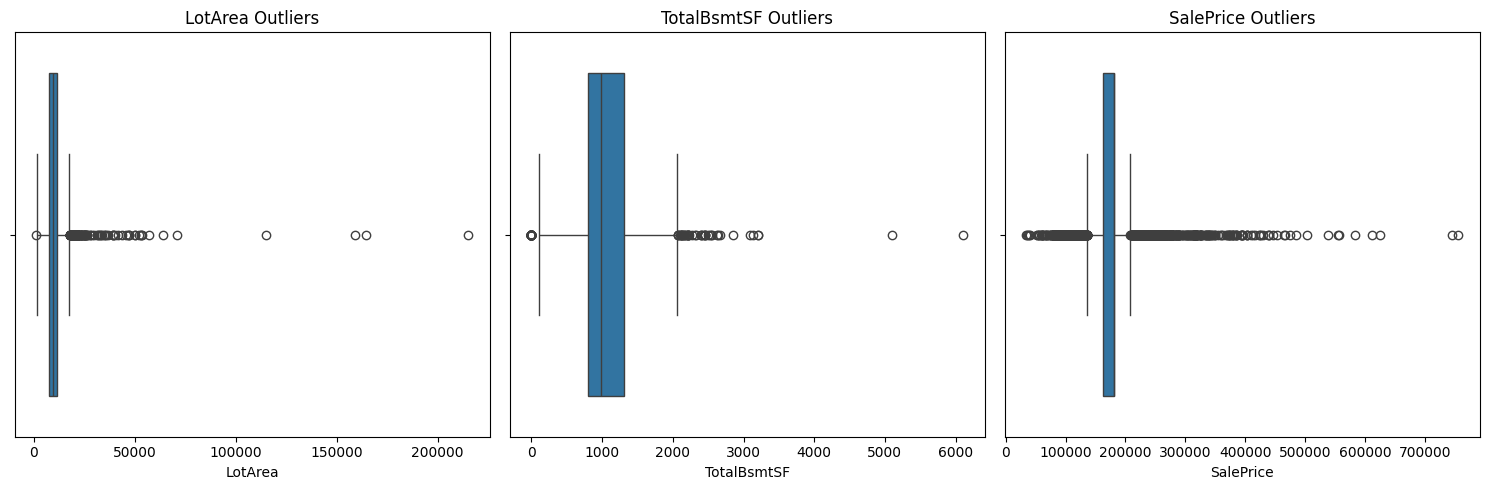

In [17]:
# Boxplots for outlier detection
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=data['LotArea'])
plt.title('LotArea Outliers')

plt.subplot(1, 3, 2)
sns.boxplot(x=data['TotalBsmtSF'])
plt.title('TotalBsmtSF Outliers')

plt.subplot(1, 3, 3)
sns.boxplot(x=data['SalePrice'])
plt.title('SalePrice Outliers')

plt.tight_layout()
plt.show()

In [18]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers from key features
data = remove_outliers(data, 'LotArea')
data = remove_outliers(data, 'TotalBsmtSF')
data = remove_outliers(data, 'SalePrice')

print(f"Data shape after outlier removal: {data.shape}")

Data shape after outlier removal: (1982, 35)


### DATA SCALING

In [21]:
# scaling the data
from sklearn.preprocessing import StandardScaler

# Features to scale
features_to_scale = ['LotArea', 'TotalBsmtSF', 'SalePrice']

# Initializing scaler
scaler = StandardScaler()

# Scaling selected features
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

print(data[features_to_scale].head())

    LotArea  TotalBsmtSF  SalePrice
0 -0.202975    -0.532360   2.302898
1  0.156952     0.674728   0.400793
3  0.141303    -0.829673  -2.522813
5  1.570057    -0.710748  -2.311468
7  0.401703     0.213894   1.704088


### Data SPLITTING

In [25]:
from sklearn.model_selection import train_test_split
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Linear Regression:")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.2f}")

Linear Regression:
RMSE: 0.88
R² Score: 0.18


#### Random Forest Regression

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("\nRandom Forest:")

print(f"RMSE: {root_mean_squared_error(y_test, y_pred_lr):.2f}")

print(f"R² Score: {r2_score(y_test, y_pred_rf):.2f}")


Random Forest:
RMSE: 0.88
R² Score: 0.65


#### Support Vector Machine

In [29]:
from sklearn.svm import SVR

svm_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("\nSupport Vector Machine (SVM):")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_svm):.2f}")



Support Vector Machine (SVM):
RMSE: 0.88
R² Score: 0.28


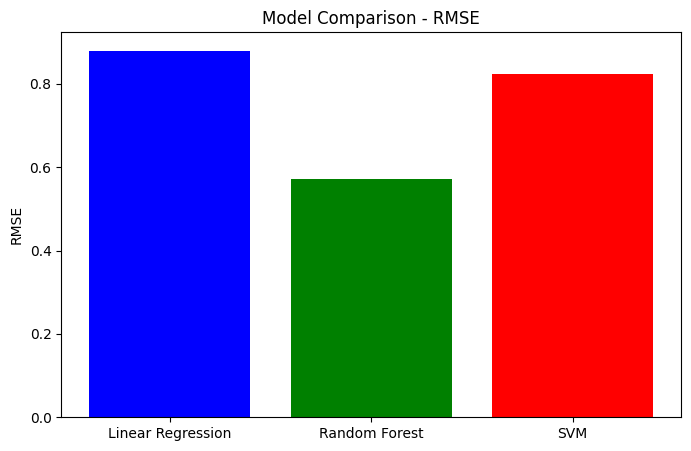

In [30]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Random Forest', 'SVM']
rmse_scores = [
    root_mean_squared_error(y_test, y_pred_lr),
    root_mean_squared_error(y_test, y_pred_rf),
    root_mean_squared_error(y_test, y_pred_svm)
]

plt.figure(figsize=(8, 5))
plt.bar(models, rmse_scores, color=['blue', 'green', 'red'])
plt.title('Model Comparison - RMSE')
plt.ylabel('RMSE')
plt.show()


In [32]:
# The Random Forest model is the best choice based on the RMSE comparison.